In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bodyfat.csv to bodyfat (3).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bodyfat.csv']))

In [ ]:
df.head(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
x = df.drop('BodyFat', axis = 1)
y = df['BodyFat']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

In [ ]:
x_train.shape

(176, 14)

In [ ]:
x_val.shape

(38, 14)

In [ ]:
x_test.shape

(38, 14)

In [ ]:
x_train[0].shape

(14,)

In [ ]:
Layers = []
Regularization = []
Epochs = []
Activation = []
LearningRate = []
History = []
Loss = []
Accuracy = []

In [ ]:
for l in range(3):
  for reg in [None, "l1", "l2"]:
    for act in ["sigmoid", "relu"]:
      for lr in [1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]:
        for ep in [10, 20, 30, 40]:
          model = tf.keras.Sequential()
          model.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer"))
          model.add(tf.keras.layers.Dense(128,activation=act, name="hiddenLayer1", kernel_regularizer=reg))
          if l >= 1:
            model.add(tf.keras.layers.Dense(64,activation=act, name="hiddenLayer2", kernel_regularizer=reg))
          if l >= 2:
            model.add(tf.keras.layers.Dense(32,activation=act, name="hiddenLayer3", kernel_regularizer=reg))

          model.add(tf.keras.layers.Dense(1,activation="linear", name="outputLayer"))
          
          opt = tf.keras.optimizers.Adam(learning_rate=lr)

          model.compile(optimizer=opt,
          loss="mse",
          metrics=[tf.keras.metrics.RootMeanSquaredError()])

          history = model.fit(x_train, y_train, epochs=ep, validation_data=(x_val,y_val))

          test_loss, test_acc = model.evaluate(x_test, y_test)

          History.append(history)
          Layers.append(l)
          Regularization.append(reg)
          Epochs.append(ep)
          Activation.append(act)
          LearningRate.append(lr)
          Loss.append(test_loss)
          Accuracy.append(test_acc)

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 10ms/step - loss: 473.5433 - root_mean_squared_error: 21.4935 - val_loss: 428.4970 - val_root_mean_squared_error: 20.4188
Epoch 21/30
6/6 [==============================] - 0s 11ms/step - loss: 473.2843 - root_mean_squared_error: 21.4875 - val_loss: 428.2492 - val_root_mean_squared_error: 20.4127
Epoch 22/30
6/6 [==============================] - 0s 14ms/step - loss: 473.0228 - root_mean_squared_error: 21.4815 - val_loss: 428.0028 - val_root_mean_squared_error: 20.4067
Epoch 23/30
6/6 [==============================] - 0s 10ms/step - loss: 472.7622 - root_mean_squared_error: 21.4754 - val_loss: 427.7566 - val_root_mean_squared_error: 20.4007
Epoch 24/30
6/6 [==============================] - 0s 10ms/step - loss: 472.5060 - root_mean_squared_error: 21.4695 - val_loss: 427.5083 - val_root_mean_squared_error: 20.3946
Epoch 25/30
6/6 [==============================] - 0s 10ms/step - loss: 472.2435 

In [ ]:
len(History)

576

In [ ]:
len(History[0].history['val_root_mean_squared_error'])

10

In [ ]:
History[22].history

{'loss': [428.4838562011719,
  411.2527160644531,
  394.7654113769531,
  379.0901184082031,
  363.1749267578125,
  348.46563720703125,
  334.15057373046875,
  319.5665283203125,
  305.6885986328125,
  292.2168884277344,
  279.5102844238281,
  267.0632629394531,
  254.94903564453125,
  243.0980987548828,
  231.88185119628906,
  220.9799346923828,
  210.5907745361328,
  200.25347900390625,
  190.5556640625,
  180.96405029296875,
  172.13302612304688,
  163.1470184326172,
  154.8513641357422,
  146.68038940429688,
  139.00193786621094,
  131.58416748046875,
  124.65060424804688,
  117.79332733154297,
  111.4371566772461,
  105.33477020263672],
 'root_mean_squared_error': [20.699851989746094,
  20.279367446899414,
  19.868703842163086,
  19.470237731933594,
  19.057147979736328,
  18.667234420776367,
  18.27978515625,
  17.87642478942871,
  17.483951568603516,
  17.09435272216797,
  16.71856117248535,
  16.342069625854492,
  15.967123985290527,
  15.59160327911377,
  15.227666854858398,
  

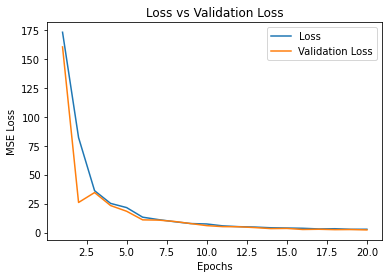

Layers=1, Activation=sigmoid, Regularization=l1, epochs=20, Learning Rate=0.1






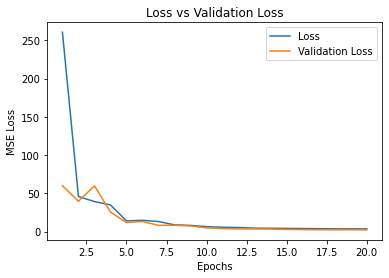

Layers=1, Activation=sigmoid, Regularization=l1, epochs=20, Learning Rate=0.03






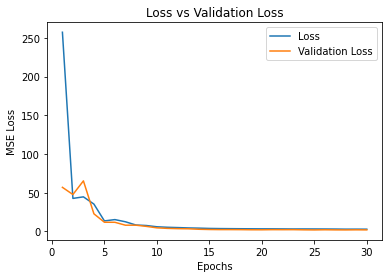

Layers=1, Activation=sigmoid, Regularization=l1, epochs=30, Learning Rate=0.03






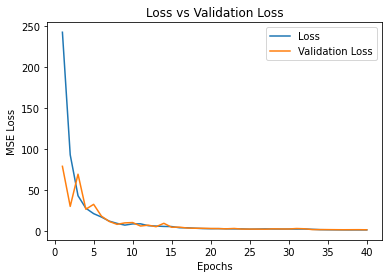

Layers=1, Activation=relu, Regularization=l1, epochs=40, Learning Rate=0.1






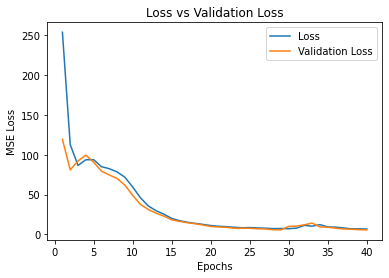

Layers=2, Activation=sigmoid, Regularization=l1, epochs=40, Learning Rate=0.03






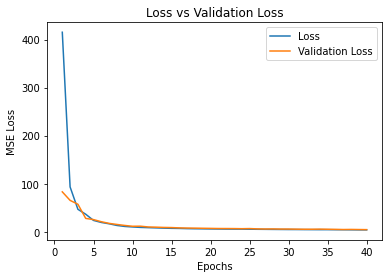

Layers=2, Activation=relu, Regularization=l1, epochs=40, Learning Rate=0.03






In [ ]:
for i in range(len(Layers)):
  if Accuracy[i]<1.5:
    acc = History[i].history['root_mean_squared_error']
    val_acc = History[i].history['val_root_mean_squared_error']
    loss = History[i].history['loss']
    val_loss = History[i].history['val_loss']
  
    ep = np.arange(1,Epochs[i]+1)
    plt.title("Loss vs Validation Loss")
    sns.lineplot(x=ep,y = loss)
    sns.lineplot(x=ep,y = val_loss)
    #plt.xticks([0,10,20,30,40])
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.legend(["Loss", "Validation Loss"])
    plt.show()
    print("Layers={layer}, Activation={activation}, Regularization={r}, epochs={e}, Learning Rate={rate}".format(layer=Layers[i]+1, r=Regularization[i], activation=Activation[i], e=Epochs[i], rate=LearningRate[i]))
    print("\n\n\n")

## Conclusion:<br>
MSE Loss of Models with RMSE score < 1.5 are plotted above.<br><br>
From these models we can conclude that the optimal hyperparameters are:<br>
Layers: 1 or 2 Hidden Layers<br>
Activation: Sigmoid/Relu<br>
Regularization: L1<br>
Epochs: 20/30/40<br>
Learning Rate: 0.03, 0.1<br>